# Problem Statement

In [1]:
#import all modules
import numpy as np
import matplotlib.pyplot as plt
import math
from operator import mul
import seaborn as sns

In [2]:
# poisson distribution
def poisson_pmf(Lambda, no_of_events):
    '''
    Arguments :
        Lambda(float, >0): the value of lambda
        no_of_events(int, 0 to inf): no of the events
    returns :
        probability(float, 0 to 1): probability of no_of_events occuring 
    '''
    probability = np.exp(-Lambda)*math.pow(Lambda, no_of_events) / np.prod([i for i in range(1, no_of_events+1)])

    return probability

# Binomial Random Variable

A binomial random variable models the number of successes in a fixed number of independent Bernoulli trials, each with a constant probability of success.

>The probability of getting exactly k successes in n trials is given by:

$P(X = k) = \binom{n}{k} \cdot p^k \cdot (1-p)^{n-k}$


Where:

- $P(X = k):$ Probability of k successes in `n` trials

- $\binom{n}{k}:$ Binomial coefficient, also denoted as `nCk` or `n` choose `k`, which represents the number of ways to choose `k` items from a set of `n` items.

- $p:$ Probability of success on a single trial

- $(1-p)^{n-k}:$ Probability of n-k failures

**Example:**

Consider flipping a coin 10 times. Let's say the probability of getting heads on a single flip is `p = 0.5`.

- P(X = 3): Probability of getting `3` heads in `10` flips = $\binom{1}{3} * 0.5^{3} * 0.5^{7}$

>The binomial random variable helps us understand and quantify the number of successes in a fixed number of independent trials.

In [3]:
import math

def get_binomial_prob(n: int, p: float, vals: list[int]) -> list[float]:
    """
    Calculates the binomial probability for a given set of values.

    Args:
        n (int): The number of trials.
        p (float): The probability of success on each trial.
        vals (list): A list of integer values representing the number of successes.

    Returns:
        list: A list of probabilities corresponding to the input values,
              where the probability at index i corresponds to the value at index i in the input list.

    Raises:
        ValueError: If the input probability `p` is not between 0 and 1, or if the input values contain non-integer or negative values,
                    or if the number of trials `n` is non-positive.

    Example:
        ```python
        probabilities = get_binomial_prob(10, 0.5, [2, 3, 4])
        print(probabilities)  # Output: [0.0439453125, 0.1171875, 0.205078125]
        ```
    """

    if not 0 < p < 1:
        raise ValueError("Probability p must be between 0 and 1.")
    if n <= 0:
        raise ValueError("Number of trials n must be positive.")
    if not all(isinstance(val, int) and 0 <= val <= n for val in vals):
        raise ValueError("All values in the list must be non-negative integers less than or equal to n.")

    probs = [math.comb(n, k) * p**k * (1-p)**(n-k) for k in vals]
    return probs

In [4]:
n= 10
p= 0.5
vals = range(1,11)
probs = get_binomial_prob(n, p, vals)

for val, prob in zip(vals, probs):
    print(f"P(X={val}) = {prob}")

P(X=1) = 0.009765625
P(X=2) = 0.0439453125
P(X=3) = 0.1171875
P(X=4) = 0.205078125
P(X=5) = 0.24609375
P(X=6) = 0.205078125
P(X=7) = 0.1171875
P(X=8) = 0.0439453125
P(X=9) = 0.009765625
P(X=10) = 0.0009765625


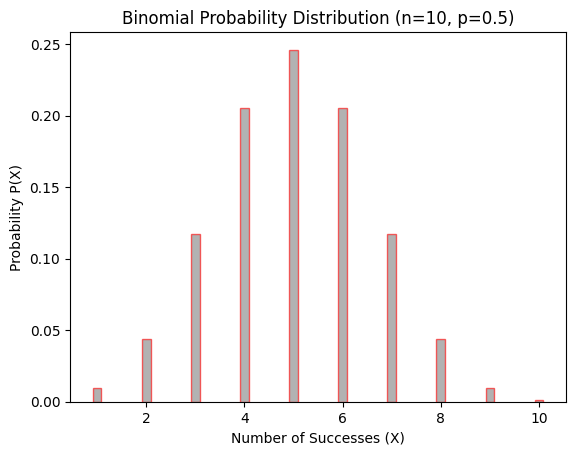

In [5]:
import matplotlib.pyplot as plt

plt.bar(vals, probs, color='gray', edgecolor='red', align='center', alpha=0.6, width=0.18)
plt.xlabel("Number of Successes (X)")
plt.ylabel("Probability P(X)")
plt.title("Binomial Probability Distribution (n=10, p=0.5)")
plt.show()

Geometric Random variables

P(X=k)=(1−p)k−1p,k=1,2,3,... 

Where:

P(X=k):  Probability of the first success on the kth trial.

p:  Probability of success on a single trial

(1−p)(k−1):  Probability of  k−1  failures before the first success.

Example: Consider flipping a coin until you get heads. Let's say the probability of getting heads on a single flip is  p=0.5 .

P(X=1):  Probability of getting heads on the first flip = 0.5

P(X=2):  Probability of getting tails on the first flip and heads on the second = 0.5 * 0.5 = 0.25

P(X=3):  Probability of getting tails on the first two flips and heads on the third = 0.5 * 0.5 * 0.5 = 0.125

Applications:

Quality Control: Modeling the number of items inspected until a defective one is found.

Reliability Engineering: Modeling the time until a component fails. Sports: Modeling the number of attempts needed to score a goal or make a free throw.

Biology: Modeling the number of generations until a specific mutation occurs.

In essence, the geometric random ariable helps us understand and quantify the waiting time for a specific event to happen in a sequence of Bernoulli trials.

In [6]:
def calculate_geometric_prob(success_prob: float, trials: list[int]) -> list[float]:
    """
    Compute geometric probabilities for a given list of trial numbers.

    Args:
        success_prob (float): Probability of success in each trial (0 < success_prob < 1).
        trials (list[int]): List of positive integers, each representing the number of trials.

    Returns:
        list[float]: A list where each element corresponds to the geometric probability
                     for the respective trial count in the input list.

    Raises:
        ValueError: If `success_prob` is not within the range (0, 1),
                    or if the `trials` list contains invalid values (non-positive integers).

    Example:
        ```python
        result = calculate_geometric_prob(0.3, [1, 2, 3])
        print(result)  # Example output: [0.3, 0.21, 0.147]
        ```
    """
    # Validate the probability of success
    if success_prob <= 0 or success_prob >= 1:
        raise ValueError("The success probability must be in the range (0, 1).")

    # Ensure all trial counts are valid positive integers
    if not all(isinstance(trial, int) and trial > 0 for trial in trials):
        raise ValueError("All entries in the trials list must be positive integers.")

    # Calculate the geometric probabilities
    geometric_probs = [((1 - success_prob) ** (trial - 1)) * success_prob for trial in trials]

    return geometric_probs

In [7]:
p = 0.5
vals= range(1,11)
probs = calculate_geometric_prob(p, vals)

for val, prob in zip(vals, probs):
    print(f"P(X={val}) = {prob}")

P(X=1) = 0.5
P(X=2) = 0.25
P(X=3) = 0.125
P(X=4) = 0.0625
P(X=5) = 0.03125
P(X=6) = 0.015625
P(X=7) = 0.0078125
P(X=8) = 0.00390625
P(X=9) = 0.001953125
P(X=10) = 0.0009765625


C:\Users\anura\AppData\Local\Temp\ipykernel_7440\3911845213.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vals, y=probs, palette="viridis", edgecolor="black", width=0.5)


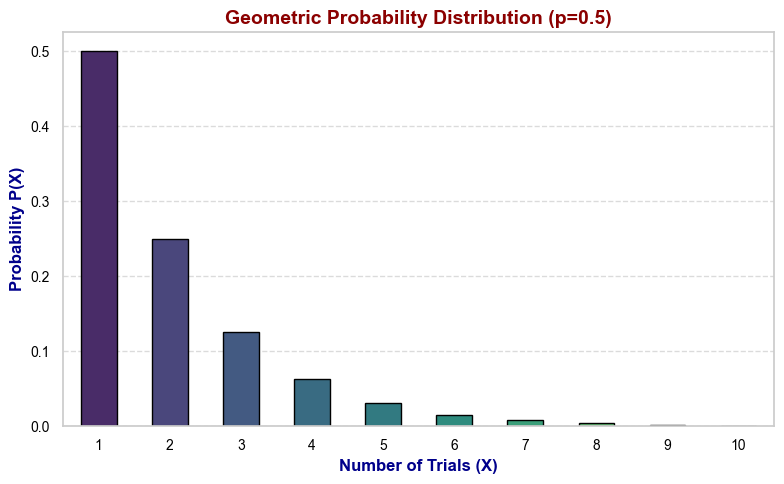

In [8]:
# Set Seaborn style for better aesthetics
sns.set_theme(style="whitegrid")

# Create the bar plot with Seaborn-like style
plt.figure(figsize=(8, 5))  # Adjust the figure size
sns.barplot(x=vals, y=probs, palette="viridis", edgecolor="black", width=0.5)

# Add labels and title
plt.xlabel("Number of Trials (X)", fontsize=12, weight='bold', color='darkblue')
plt.ylabel("Probability P(X)", fontsize=12, weight='bold', color='darkblue')
plt.title("Geometric Probability Distribution (p=0.5)", fontsize=14, weight='bold', color='darkred')

# Customize ticks for better readability
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')

# Add grid for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()